# Principio de Segregación de Interfaces (Interface Segregation Principle)

## Introducción
El principio de segregación de interfaces (ISP) indica que los clientes no deben verse forzados a depender de interfaces que no utilizan. Es preferible tener varias interfaces específicas en lugar de una general.

## Objetivos
- Comprender el principio de segregación de interfaces y su aplicación en Python.
- Identificar violaciones al ISP en jerarquías de clases.
- Aplicar el ISP para crear sistemas más flexibles y desacoplados.

## Ejemplo de la vida real
En una cafetería, el menú para clientes y el menú para empleados son diferentes: cada uno ve solo lo que necesita, no todo el menú completo.

# Principio de Segregación de Interfaces (Interface Segregation Principle, ISP)

## Introducción

El Principio de Segregación de Interfaces (ISP) es uno de los cinco principios SOLID de diseño orientado a objetos. Fue introducido por Robert C. Martin y establece que los clientes no deberían verse obligados a depender de interfaces que no utilizan. En otras palabras, es mejor tener muchas interfaces específicas y pequeñas que una única interfaz general y grande.

## Explicación Detallada

### Definición

- **ISP**: Los clientes no deberían verse obligados a depender de interfaces que no utilizan.

### Beneficios del ISP

1. **Mantenibilidad**: Facilita la modificación del código sin afectar a los clientes que no utilizan ciertas funcionalidades.

2. **Reusabilidad**: Promueve la creación de interfaces específicas y reutilizables.

3. **Flexibilidad**: Permite a los clientes depender solo de las funcionalidades que realmente necesitan.

## Ejemplos Explicados

### Ejemplo Correcto

Supongamos que estamos desarrollando una aplicación para gestionar diferentes tipos de trabajadores. Aplicando el ISP, podríamos tener las siguientes interfaces y clases:


In [1]:
from abc import ABC, abstractmethod

class Worker(ABC):
    @abstractmethod
    def work(self) -> None:
        pass

class Eater(ABC):
    @abstractmethod
    def eat(self) -> None:
        pass

class Developer(Worker, Eater):
    def work(self) -> None:
        print("El desarrollador está trabajando.")

    def eat(self) -> None:
        print("El desarrollador está comiendo.")

class Robot(Worker):
    def work(self) -> None:
        print("El robot está trabajando.")

In [2]:
# Ejemplo de uso
developer = Developer()
robot = Robot()

developer.work()
developer.eat()
robot.work()

El desarrollador está trabajando.
El desarrollador está comiendo.
El robot está trabajando.


#### Análisis del Ejemplo Correcto

- **Worker**: Define la interfaz para trabajar.

- **Eater**: Define la interfaz para comer.

- **Developer**: Implementa ambas interfaces, ya que un desarrollador puede trabajar y comer.

- **Robot**: Implementa solo la interfaz `Worker`, ya que un robot solo puede trabajar.

Este diseño permite que los clientes dependan solo de las interfaces que realmente necesitan. Por ejemplo, un cliente que necesita un trabajador solo necesita depender de la interfaz `Worker`.

### Ejemplo de Violación del ISP

Veamos un ejemplo donde se viola el ISP:

In [3]:
class Worker:
    def work(self) -> None:
        pass

    def eat(self) -> None:
        pass

class Developer(Worker):
    def work(self) -> None:
        print("El desarrollador está trabajando.")

    def eat(self) -> None:
        print("El desarrollador está comiendo.")

class Robot(Worker):
    def work(self) -> None:
        print("El robot está trabajando.")

    def eat(self) -> None:
        # Los robots no comen, pero deben implementar este método
        pass

In [4]:
# Ejemplo de uso
developer = Developer()
robot = Robot()

developer.work()
developer.eat()
robot.work()
robot.eat()  # Este método no tiene sentido para un robot

El desarrollador está trabajando.
El desarrollador está comiendo.
El robot está trabajando.


#### Análisis del Ejemplo Incorrecto

- **Worker**: Tiene métodos que no son relevantes para todos los clientes (por ejemplo, `eat` para un robot).

- **Robot**: Se ve obligado a implementar el método `eat`, aunque no tiene sentido para un robot.

Este diseño viola el ISP porque los clientes (en este caso, `Robot`) se ven obligados a depender de métodos que no utilizan.

## Conclusión

1. **Reducción de Dependencias**: El ISP reduce las dependencias innecesarias entre los clientes y las interfaces.

2. **Mantenibilidad**: Mejora la mantenibilidad del código al permitir cambios en las interfaces sin afectar a todos los clientes.

3. **Reusabilidad**: Promueve la creación de interfaces específicas y reutilizables.

4. **Flexibilidad**: Permite a los clientes depender solo de las funcionalidades que realmente necesitan.

Aplicar el ISP puede requerir la creación de múltiples interfaces específicas, pero los beneficios en términos de flexibilidad y mantenibilidad del software son significativos.

## Ejercicios prácticos y preguntas de reflexión

1. **Divide interfaces**: Observa una clase que implemente métodos que no utiliza. ¿Cómo podrías dividir la interfaz para que cada clase implemente solo lo necesario?

In [ ]:
from abc import ABC, abstractmethod
class MultiFunctionPrinter(ABC):

    @abstractmethod
    def print_document(self, document: str) -> None:
      pass

    @abstractmethod
    def scan_document(self, document: str) -> None:
      pass

    @abstractmethod
    def fax_document(self, document: str) -> None:
      pass

class SimplePrinter(MultiFunctionPrinter):
    def print_document(self, document: str) -> None:
        print(f"Imprimiendo documento: {document}")

    #Esta clase se ve obligada a implementar métodos que no utiliza
    def scan_document(self, document: str) -> None:
      pass

    def fax_document(self, document: str) -> None:
      pass

El ejemplo anterior no cumple con el principio de segregación de interfaz por locual dividimos en varias interfaces para solucionarlo

In [2]:
class Printer(ABC):
    @abstractmethod
    def print_document(self, document: str) -> None:
        pass

class Scanner(ABC):
    @abstractmethod
    def scan_document(self, document: str) -> None:
        pass

class Fax(ABC):
    @abstractmethod
    def fax_document(self, document: str) -> None:
        pass

class SimplePrinter(Printer):
    def print_document(self, document: str) -> None:
        print(f"Imprimiendo documento: {document}")

class AdvancedPrinter(Printer, Scanner, Fax):
    def print_document(self, document: str) -> None:
        print(f"Imprimiendo documento: {document}")

    def scan_document(self, document: str) -> None:
        print(f"Escaneando documento: {document}")

    def fax_document(self, document: str) -> None:
        print(f"Enviando fax del documento: {document}")

In [3]:
# Ejemplo de uso
simple_printer = SimplePrinter()
advanced_printer = AdvancedPrinter()

simple_printer.print_document("Informe anual")
advanced_printer.scan_document("Informe de ventas")
advanced_printer.fax_document("Factura de servicios")

Imprimiendo documento: Informe anual
Escaneando documento: Informe de ventas
Enviando fax del documento: Factura de servicios


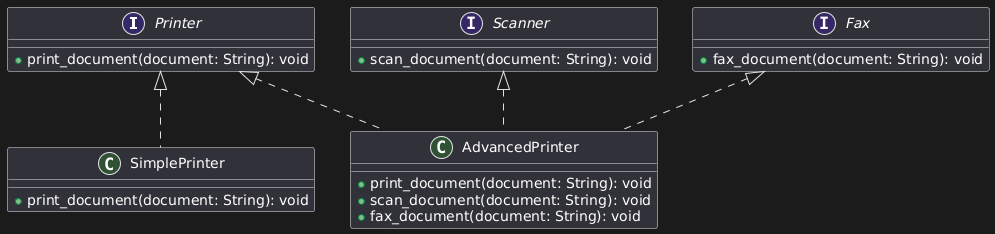

2. **Refactoriza**: Crea varias interfaces pequeñas y haz que las clases implementen solo las que requieran.

In [4]:
from abc import ABC, abstractmethod

class Animal(ABC):
    @abstractmethod
    def hacer_sonido(self) -> str:
        pass

class Canino(Animal):
    @abstractmethod
    def buscar(self) -> str:
        pass

class Felino(Animal):
    @abstractmethod
    def trepar(self) -> str:
        pass

class Perro(Canino):
    def hacer_sonido(self) -> str:
        return "Guau"

    def buscar(self) -> str:
        return "Buscando la pelota!"

class Gato(Felino):
    def hacer_sonido(self) -> str:
        return "Meow"

    def trepar(self) -> str:
        return "Trepar por el árbol!"

In [5]:
#ejemplo de uso
perro = Perro()
gato = Gato()

print(perro.hacer_sonido())  # Output: Guau
print(perro.buscar())       # Output: Buscando la pelota!

print(gato.hacer_sonido())  # Output: Meow
print(gato.trepar())       # Output: Trepar por el árbol!

Guau
Buscando la pelota!
Meow
Trepar por el árbol!


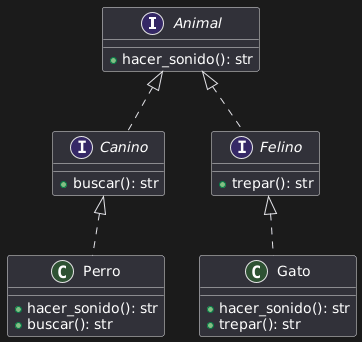

3. **Pregunta de reflexión**: ¿Qué problemas surgen cuando una clase depende de métodos que no usa?

- Dificultad para mantener y entender el código.
- Aumento del acoplamiento entre clases.
- Violación del Principio de Segregación de Interfaces (ISP).
- Mayor probabilidad de errores y bugs.
- Reducción de la reutilización de código.
- Problemas de rendimiento debido a la sobrecarga innecesaria.

## Autoevaluación
1. ¿Mis clases implementan solo los métodos que realmente necesitan?

- La clase Perro implementa los métodos hacer_sonido() y buscar(), que son relevantes para su comportamiento.
- La clase Gato implementa los métodos hacer_sonido() y trepar(), que son relevantes para su comportamiento.
- La clase SimplePrinter implementa solo el método print_document(), que es relevante para su funcionalidad.
- La clase AdvancedPrinter implementa los métodos print_document(), scan_document() y fax_document(), que son relevantes para su funcionalidad.
Sí, todas las clases implementan solo los métodos que realmente necesitan, cumpliendo con el principio de segregación de interfaces.

2. ¿Qué ventajas aporta el ISP en proyectos grandes y colaborativos?

- Facilita el mantenimiento y la evolución del código.
- Reduce el acoplamiento entre componentes.
- Mejora la claridad y comprensión del diseño.
- Permite una mayor reutilización de código.
- Facilita las pruebas unitarias y la integración.
- Fomenta la colaboración entre equipos al definir contratos claros.

## Referencias y recursos
- [Interface Segregation Principle – Wikipedia](https://en.wikipedia.org/wiki/Interface_segregation_principle)
- [SOLID Principles en Python – Real Python](https://realpython.com/solid-principles-python/)
- [Ejemplo didáctico de ISP – Refactoring Guru](https://refactoring.guru/es/design-patterns/interface-segregation-principle)